In [10]:
%load_ext autoreload
# %reload_ext autoreload
import os
if os.getcwd().split('\\')[-1] != 'irl-chess':
    os.chdir('../')
import chess
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

from tqdm import tqdm
from irl_chess import alpha_beta_search_k, quiescence_search, evaluate_board, list_first_moves, eval_pos, sunfish_move_to_str
from irl_chess import alpha_beta_search
from irl_chess import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Outcome(termination=<Termination.CHECKMATE: 1>, winner=True)
True
. . . . . . . .
. . . . . 1 . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .


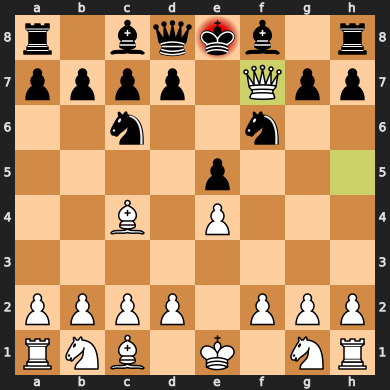

In [11]:
# A simple demonstration of the board object in the chess package.
board1 = chess.Board()
board1.push_san("e4")
board1.push_san("e5")
board1.push_san("Qh5")
board1.push_san("Nc6")
board1.push_san("Bc4")
board1.push_san("Nf6")
board1.push_san("Qxf7")
board1.is_checkmate()
print(board1.outcome())
print(board1.is_attacked_by(chess.WHITE, chess.E8))
print(board1.attackers(chess.WHITE, chess.E8)) # King tile is only attacked by queen on f7
board1

None


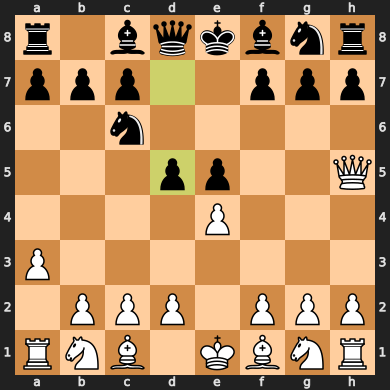

In [12]:
# Now consider this more even position
board2 = chess.Board()
board2.push_san("e4")
board2.push_san("e5")
board2.push_san("Qh5")
board2.push_san("Nc6")
board2.push_san("a3")
board2.push_san("d5")
print(board2.outcome()) # The outcome is None, indicating the game is still ongoing
board2

In [13]:
from irl_chess.chess_utils.sunfish_utils import sunfish_move, sunfish_best_board, board2sunfish
from irl_chess import pst
sunfish_state = board2sunfish(board2, 0)
best_move, best_moves, move_dict, best_board_found_tuple = sunfish_move(sunfish_state, pst, time_limit=5, min_depth=2, return_best_board_found_tuple=True)

In [14]:
print(sunfish_state.board)
print(best_move)
print(sunfish_move_to_str(best_move, is_black=False))
score = move_dict[best_move]
print(score)
best_board_found = best_board_found_tuple[0]
#print(best_board_found.board)
print(best_board_found_tuple[1], best_board_found_tuple[2])
eval_pos(best_board_found, RP=R)


         
         
r.bqkbnr 
ppp..ppp 
..n..... 
...pp..Q 
....P... 
P....... 
.PPP.PPP 
RNB.KBNR 
         
         
Move(i=96, j=52, prom='')
f1b5
[32, 32, 32, 32, 32, 32, 34, 163, 163, 92, 92, 57, 57, 51, 57, 57, 54, 163, 163, 92, 92, 57, 57, 57, 57, 55, 55, -903, -61, 1, 31, 44, 48, 48, -919, -403, -176, -63, -5, 23, 37, 43, 43, -919, -387, -171, -64, -10, 17, 29, 29]
-27 True


27

In [15]:
permute_how_many = 10
a = np.arange(3)
b = np.arange(5)
c = np.arange(7)
permute_all = np.concatenate((a, b, c))
permute_all


d = np.arange(len(a) + len(b) + len(c))
e = np.random.choice(d, size=permute_how_many, replace=False)
print(e)
sum(e> 10)
np.random.hypergeometric(len(a), 0, 3)

[ 8  3 12 14 10 11  2 13  9  5]


3

In [18]:
%reload_ext autoreload
%autoreload 2
from irl_chess import perturb_reward, fix_cwd, load_config, union_dicts
import numpy as np
fix_cwd()
base_config_data, model_config_data = load_config()
config_data = union_dicts(base_config_data, model_config_data)
RP = np.array([100, 280, 320, 479, 929, 60000], dtype=float)
Rpst = np.array(config_data['Rpst_start'], dtype=float)
RH = np.array(config_data['RH_start'], dtype=float)
perturb_reward(RP, config_data, Rpst = None, RH = RH, epoch = None)



(array([  100.        ,   230.74418535,   320.        ,   479.        ,
          929.        , 60000.        ]),
 None,
 array([0., 0., 0.]))

In [ ]:
from irl_chess import get_new_pst
print(config_data['RP_true'])
RP=np.array(config_data['RP_true'])
print(config_data['Rpst_true'])
Rpst=np.array(config_data['Rpst_true'], dtype=float)
Rpst *= 0.5
new_pst = get_new_pst(RP=RP, Rpst=Rpst)

[100, 280, 320, 479, 929, 60000]
[1, 1, 1, 1, 1, 1]


In [ ]:
import chess

# Create a chess board
board = chess.Board()

# Get the number of legal moves
num_legal_moves = len(list(board.legal_moves))
print("Total number of legal moves:", num_legal_moves)

Total number of legal moves: 20


In [ ]:
# Evaluate the speed of sunfish using psts with ints or floats.
# Do this by evaluating the depth. 


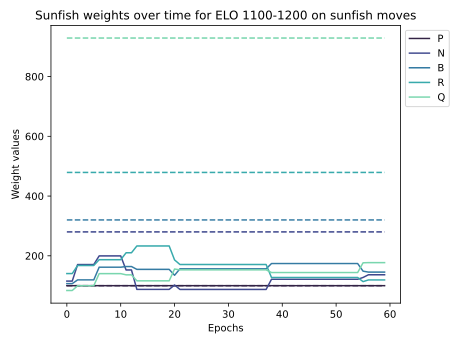

In [ ]:
from IPython.display import SVG, display

svg_file = os.path.join(os.getcwd(), 'results', 'sunfish_GRW',
                         'False-1100-1200-10_to_100-200-P_NBRQ-pst_PNBRQK-H_-all-sunfish_move-100_100_100_100_100_60000-100_280_320_479_929_60000---gaussian-40-0.6-20-1',
                           'plots','RP','weights_60RP.svg')
# Display the SVG file
display(SVG(filename=svg_file))

In [ ]:
a = [(1, 2), (3, 4), (5, 6)]
np.array(a)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [25]:
# A simple demonstration of the board object in the chess package.
board1 = chess.Board()
board1.push_san("e4")
board1.push_san("e5")
board1.push_san("Qh5")
board1.push_san("Nc6")
board1.push_san("Bc4")
board1.push_san("Nf6")
board1.push_san("Qxf7")
board1.is_checkmate()
print(board1.outcome())
print(board1.is_attacked_by(chess.WHITE, chess.E8))
print(board1.attackers(chess.WHITE, chess.E8)) # King tile is only attacked by queen on f7
board1
sunboard = board2sunfish(board1, 0)

#print(has_no_legal_moves(sunboard))
a = next(sunboard.generate_legal_moves())
# print(sunboard.board)
# print(sunboard.move(a, pst).board)
print(sunfish_move(sunboard, pst, time_limit=5))


Outcome(termination=<Termination.CHECKMATE: 1>, winner=True)
True
. . . . . . . .
. . . . . 1 . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .


         
 rn.k.bnr
 ppp.pppp
 ........
 ...p.b..
 ...P....
 ..N..N..
 PPq.PPPP
 R.BKQB.R
         
         



(None, None, None)


In [ ]:
str_to_sunfish_move(move, flip)